<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
------------------------------------
Masukkan nilai Gamma: 3


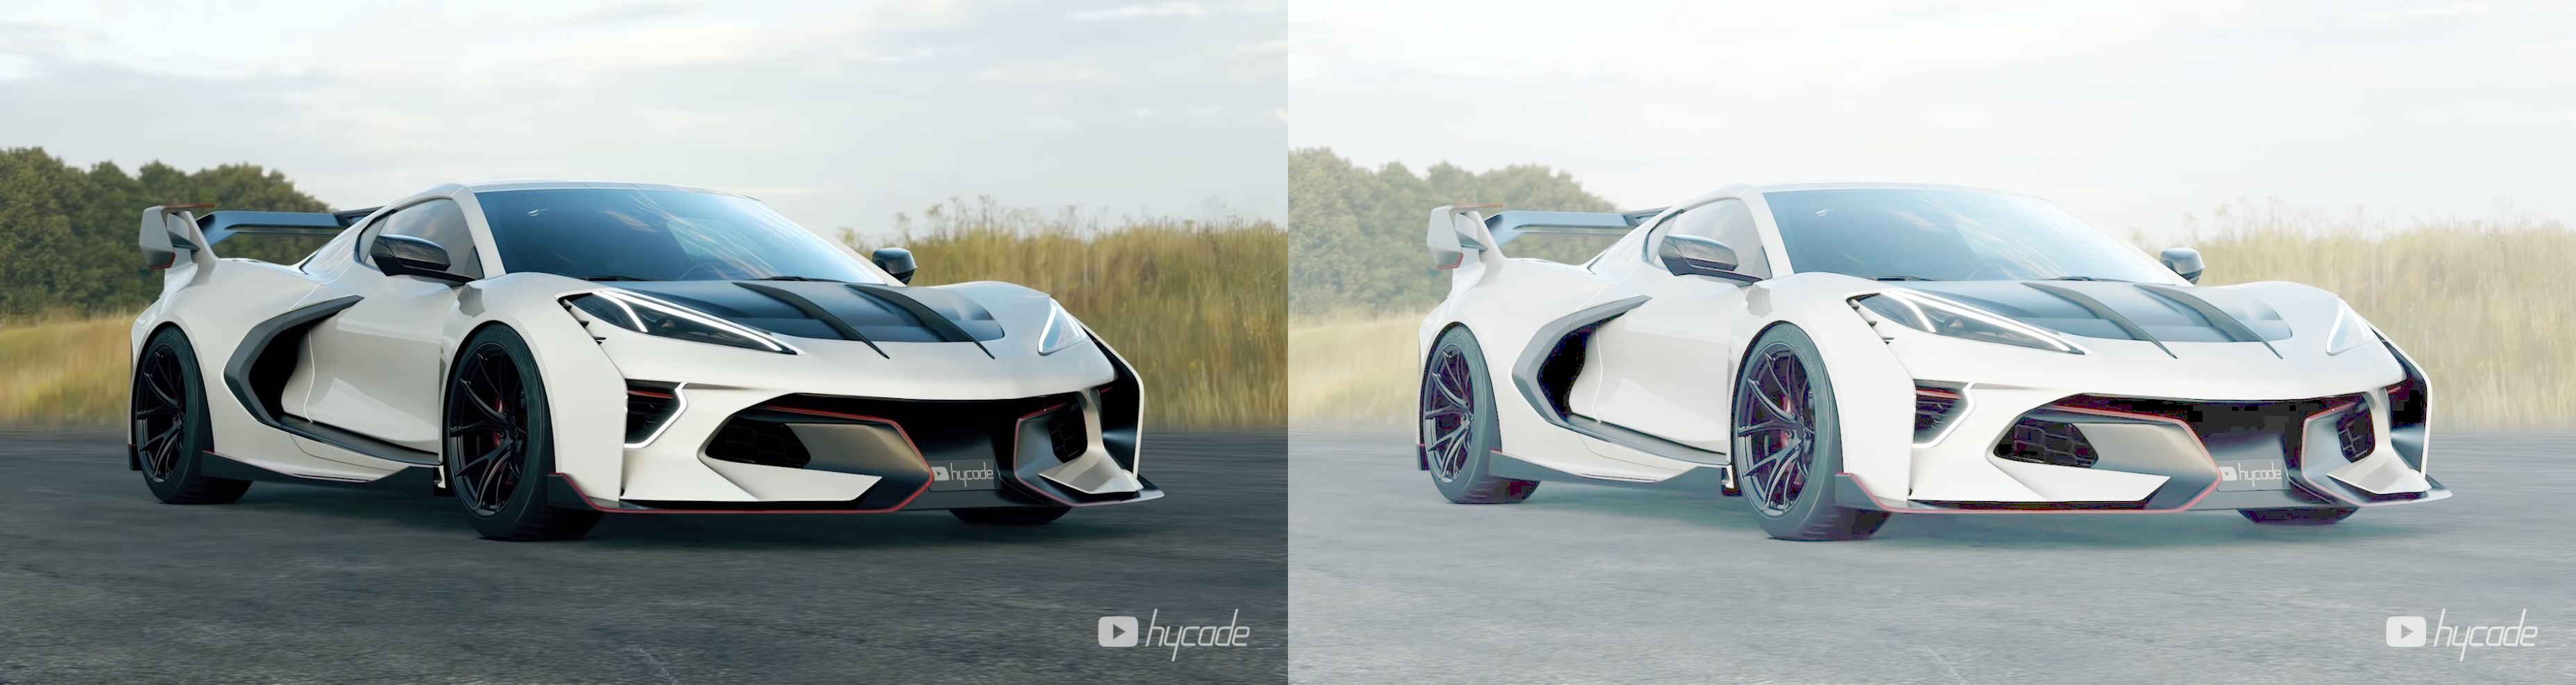

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('------------------------------------')

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Mobil.jpeg')

# Normalisasi gambar ke range 0-1
normalized = image / 255.0

# Terapkan koreksi gamma
corrected = np.power(normalized, 1/gamma)

# Kembalikan ke range 0-255 dan konversi ke uint8
output = (corrected * 255).astype(np.uint8)

# Tampilkan gambar asli dan hasil
final_frame = cv.hconcat((image, output))
cv2_imshow(final_frame)

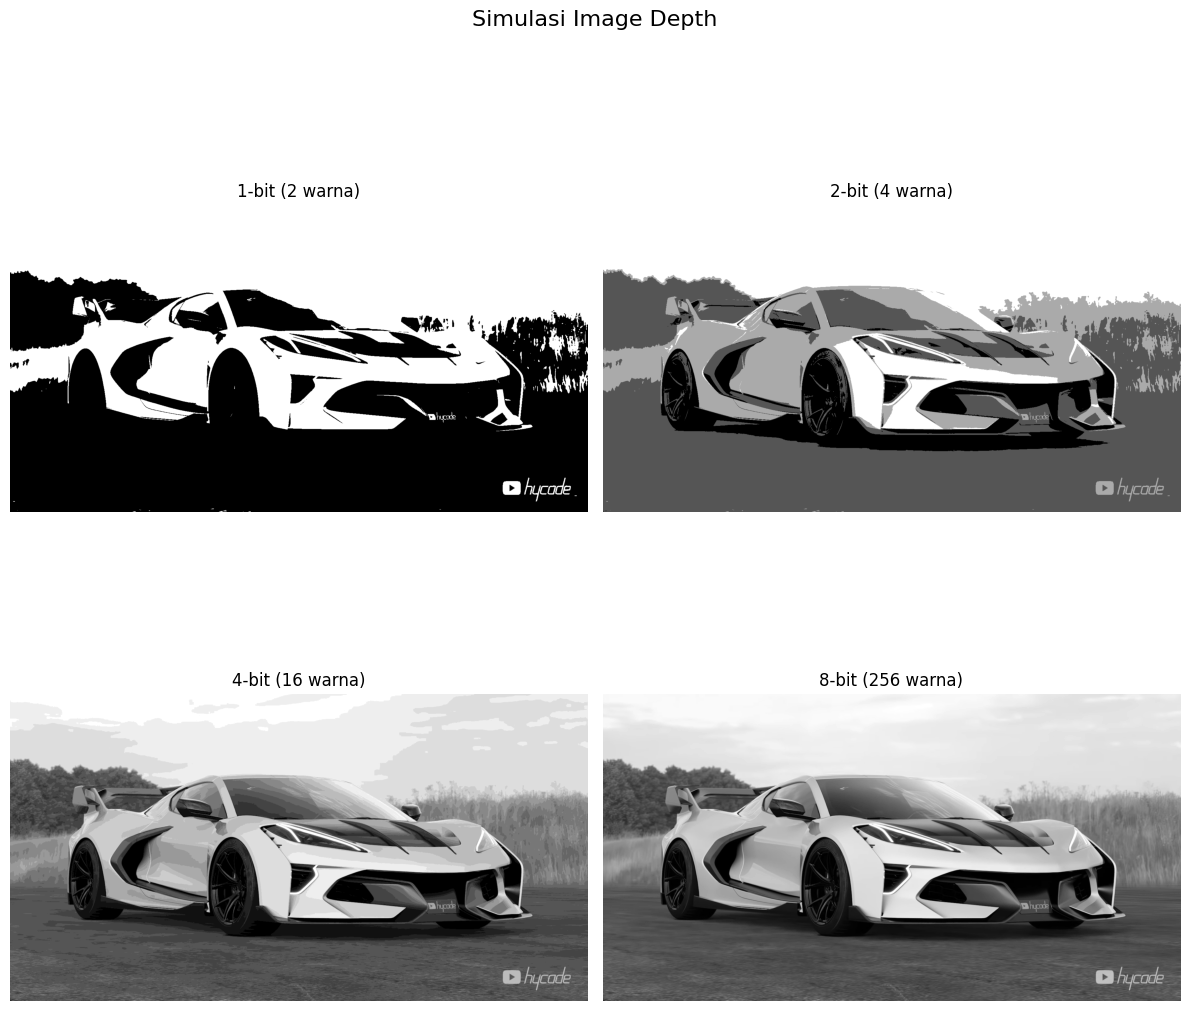

Dimensi gambar asli: (987, 1856)
Tipe data gambar asli: uint8
Nilai piksel minimum: 0
Nilai piksel maksimum: 255
Jumlah warna unik pada gambar asli: 256


In [4]:
import matplotlib.pyplot as plt

# Fungsi untuk mengubah kedalaman bit gambar
def change_bit_depth(image, bit_depth):
    level = 255 / (pow(2,bit_depth)-1)
    return np.round(image / level) * level

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Mobil.jpeg', cv.IMREAD_GRAYSCALE)

# Daftar kedalaman bit yang akan disimulasikan
bit_depths = [1, 2, 4, 8]

# Buat subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Simulasi Image Depth', fontsize=16)

# Loop untuk setiap kedalaman bit
for i, bit_depth in enumerate(bit_depths):
    # Ubah kedalaman bit gambar
    depth_image = change_bit_depth(original, bit_depth)

    # Hitung jumlah warna unik
    unique_colors = len(np.unique(depth_image))

    # Tampilkan gambar
    row = i // 2
    col = i % 2
    axs[row, col].imshow(depth_image, cmap='gray')
    axs[row, col].set_title(f'{bit_depth}-bit ({unique_colors} warna)')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Tampilkan informasi tentang gambar asli
print(f"Dimensi gambar asli: {original.shape}")
print(f"Tipe data gambar asli: {original.dtype}")
print(f"Nilai piksel minimum: {original.min()}")
print(f"Nilai piksel maksimum: {original.max()}")
print(f"Jumlah warna unik pada gambar asli: {len(np.unique(original))}")

Jumlah Citra di Average: 5
Nilai PSNR (dB): 100.00


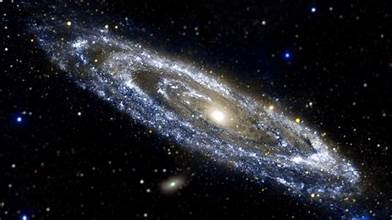

Jumlah Citra di Average: 10
Nilai PSNR (dB): 100.00


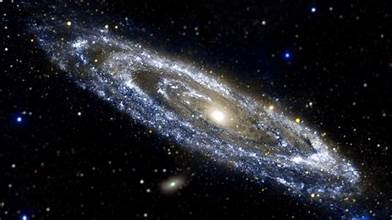

Jumlah Citra di Average: 20
Nilai PSNR (dB): 100.00


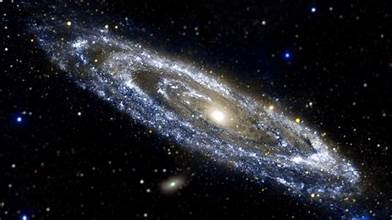

Jumlah Citra di Average: 40
Nilai PSNR (dB): 100.00


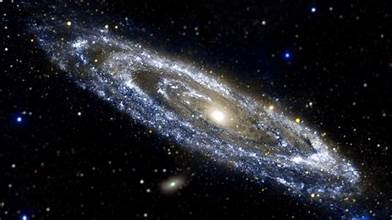

Jumlah Citra di Average: 80
Nilai PSNR (dB): 100.00


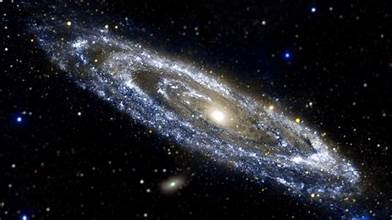

Jumlah Citra di Average: 100
Nilai PSNR (dB): 100.00


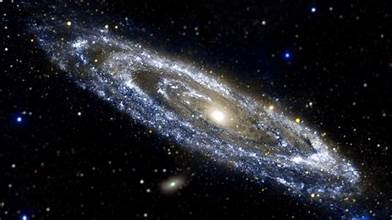


Tabel Hasil:
No | Jumlah Citra | Nilai PSNR (dB)
---|--------------|----------------
 1 |            5 | 100.00
 2 |           10 | 100.00
 3 |           20 | 100.00
 4 |           40 | 100.00
 5 |           80 | 100.00
 6 |          100 | 100.00


In [8]:
import glob
from skimage.metrics import peak_signal_noise_ratio as psnr

def average_denoising(noisy_images):
    """
    Melakukan average denoising pada sekumpulan gambar.
    """
    return np.mean(noisy_images, axis=0).astype(np.uint8)

def PSNR(original, denoised):
  mse = np.mean((original - denoised) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# Baca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/noises/1.jpg')
# Get the dimensions of the original image
height, width, _ = original.shape

# Baca semua gambar dengan noise dan resize agar sesuai dengan gambar asli
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'): # Changed to include all images for testing purposes
    n = cv.imread(img)
    # Resize the noisy image to match the original image dimensions
    n = cv.resize(n, (width, height))
    cv_img.append(n)

# Lakukan average denoising dengan jumlah gambar yang berbeda
num_images = [5, 10, 20, 40, 80, 100]
results = []

for num in num_images:
    denoised = average_denoising(cv_img[:num])
    psnr_value = PSNR(original, denoised)
    results.append((num, denoised, psnr_value))

# Tampilkan hasil
for num, denoised, psnr_value in results:
    print(f"Jumlah Citra di Average: {num}")
    print(f"Nilai PSNR (dB): {psnr_value:.2f}")
    cv2_imshow(denoised)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Tampilkan tabel hasil
print("\nTabel Hasil:")
print("No | Jumlah Citra | Nilai PSNR (dB)")
print("---|--------------|----------------")
for i, (num, _, psnr_value) in enumerate(results, 1):
    print(f"{i:2d} | {num:12d} | {psnr_value:.2f}")

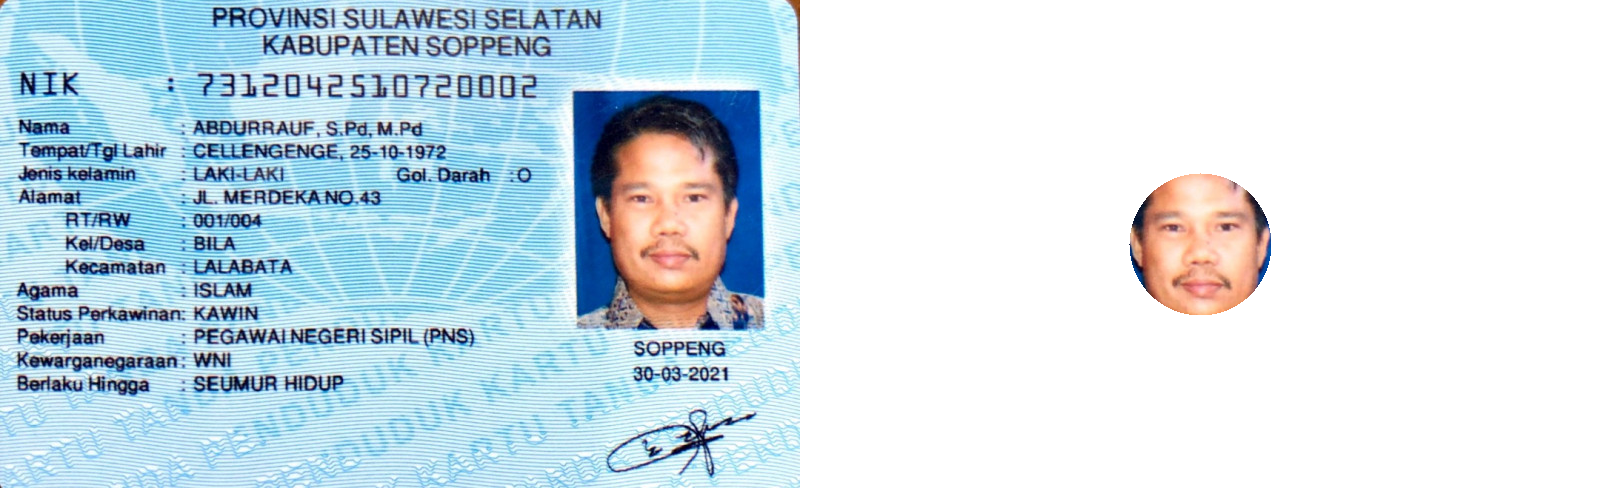

In [ ]:
def create_circular_mask(h, w, center, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

# Baca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp dummy.jpeg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Gunakan Haar Cascade untuk deteksi wajah
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

if len(faces) > 0:
    # Ambil wajah pertama yang terdeteksi
    (x, y, w, h) = faces[0]

    # Crop gambar wajah
    face_img = img[y:y+h, x:x+w]

    # Buat mask lingkaran
    center = (w//2, h//2)
    radius = min(w, h) // 2
    mask = create_circular_mask(h, w, center, radius)

    # Terapkan mask ke gambar wajah
    masked_face = face_img.copy()
    masked_face[~mask] = 255  # Set area di luar lingkaran ke putih

    # Buat gambar hasil akhir
    result = np.ones((img.shape[0], img.shape[1]*2, 3), dtype=np.uint8) * 255
    result[:, :img.shape[1]] = img

    # Tempatkan wajah yang di-mask di bagian kanan
    face_center_x = img.shape[1] + img.shape[1]//2 - w//2
    face_center_y = img.shape[0]//2 - h//2
    result[face_center_y:face_center_y+h, face_center_x:face_center_x+w] = masked_face

    cv2_imshow(result)
else:
    print("Tidak ada wajah yang terdeteksi dalam gambar.")

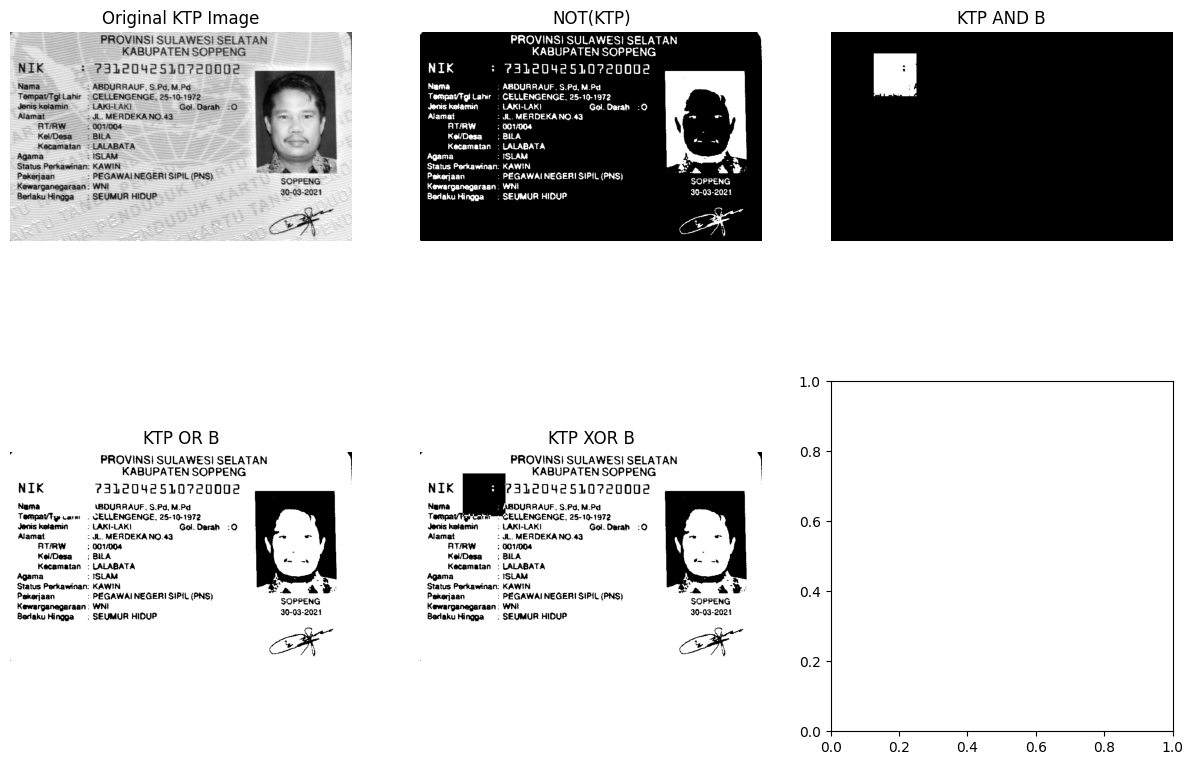

In [ ]:
# Load the KTP image as a grayscale image
ktp_image = Image.open('/content/drive/MyDrive/PCVK/Images/ktp dummy.jpeg').convert('L')

# Create a binary mask (thresholding the grayscale image to create a black-and-white version)
threshold_value = 128
ktp_binary = np.array(ktp_image) > threshold_value

# Generate a second binary image for logical operations (e.g., a rectangular region)
B_rect = np.zeros_like(ktp_binary, dtype=bool)
B_rect[50:150, 100:200] = True  # Defining a rectangular region similar to previous shapes

# Perform logical operations between the KTP image and the rectangular mask B
NOT_ktp = np.logical_not(ktp_binary).astype(np.uint8) * 255
AND_ktp_B = np.logical_and(ktp_binary, B_rect).astype(np.uint8) * 255
OR_ktp_B = np.logical_or(ktp_binary, B_rect).astype(np.uint8) * 255
XOR_ktp_B = np.logical_xor(ktp_binary, B_rect).astype(np.uint8) * 255

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display original KTP image
axs[0, 0].imshow(ktp_image, cmap='gray')
axs[0, 0].set_title('Original KTP Image')
axs[0, 0].axis('off')

# Display NOT(KTP)
axs[0, 1].imshow(NOT_ktp, cmap='gray')
axs[0, 1].set_title('NOT(KTP)')
axs[0, 1].axis('off')

# Display KTP AND B
axs[0, 2].imshow(AND_ktp_B, cmap='gray')
axs[0, 2].set_title('KTP AND B')
axs[0, 2].axis('off')

# Display KTP OR B
axs[1, 0].imshow(OR_ktp_B, cmap='gray')
axs[1, 0].set_title('KTP OR B')
axs[1, 0].axis('off')

# Display KTP XOR B
axs[1, 1].imshow(XOR_ktp_B, cmap='gray')
axs[1, 1].set_title('KTP XOR B')
axs[1, 1].axis('off')

plt.show()
